In [1]:
import pandas as pd
df = pd.read_csv('sample_time_series_dataset.csv')

In [2]:
df.head()

,Date,Value
0,2010-01-31,11.490142
1,2010-02-28,10.712512
2,2010-03-31,14.192715
3,2010-04-30,17.931195
4,2010-05-31,13.757345


In [7]:
df = df.set_index(df['Date'])
df = df.drop(columns=['Date'])
df.head()

,Value
Date,
2010-01-31,11.490142
2010-02-28,10.712512
2010-03-31,14.192715
2010-04-30,17.931195
2010-05-31,13.757345


<Axes: xlabel='Date'>

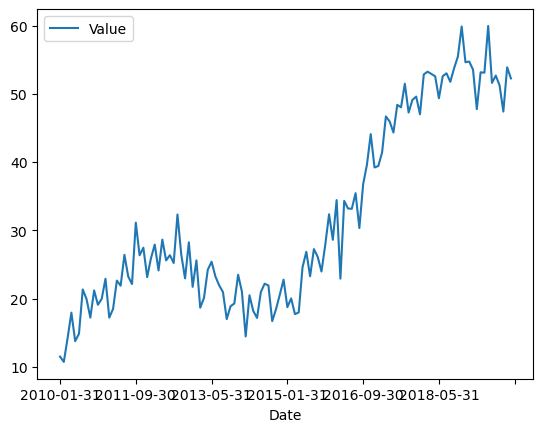

In [8]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['Value'])
adf

(-0.9865210020855062,
 0.7581486549952203,
 12,
 107,
 {'1%': -3.492995948509562,
  '5%': -2.888954648057252,
  '10%': -2.58139291903223},
 560.5515386998534)

In [10]:
df['diff1'] = df['Value'].diff()

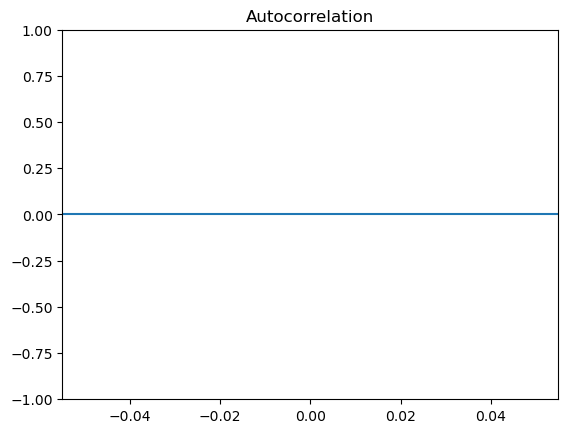

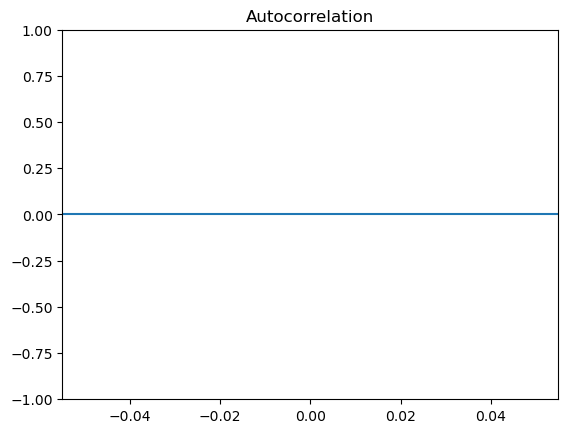

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['diff1'])

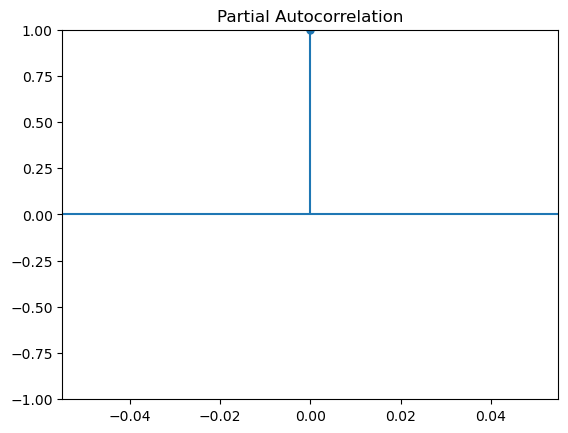

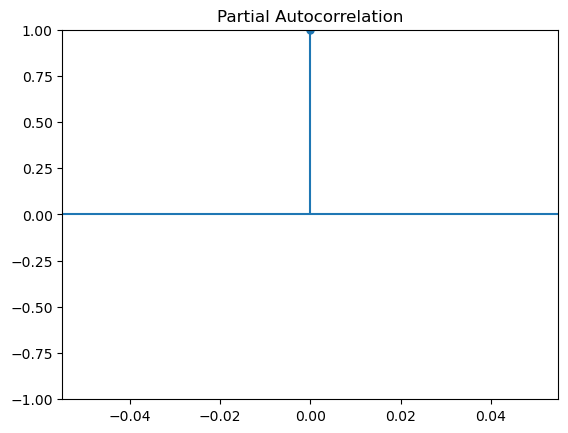

In [12]:
plot_pacf(df['diff1'])

In [20]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(df['diff1'], order=(1,1,1)).fit()
model_pred = model_arima.forecast(steps=len(df['diff1']))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [19]:
model_pred

2020-01-31    1.249675
2020-02-29   -0.057727
2020-03-31    0.536320
2020-04-30    0.266401
2020-05-31    0.389045
2020-06-30    0.333319
2020-07-31    0.358640
2020-08-31    0.347135
2020-09-30    0.352362
2020-10-31    0.349987
2020-11-30    0.351066
2020-12-31    0.350576
Freq: ME, Name: predicted_mean, dtype: float64

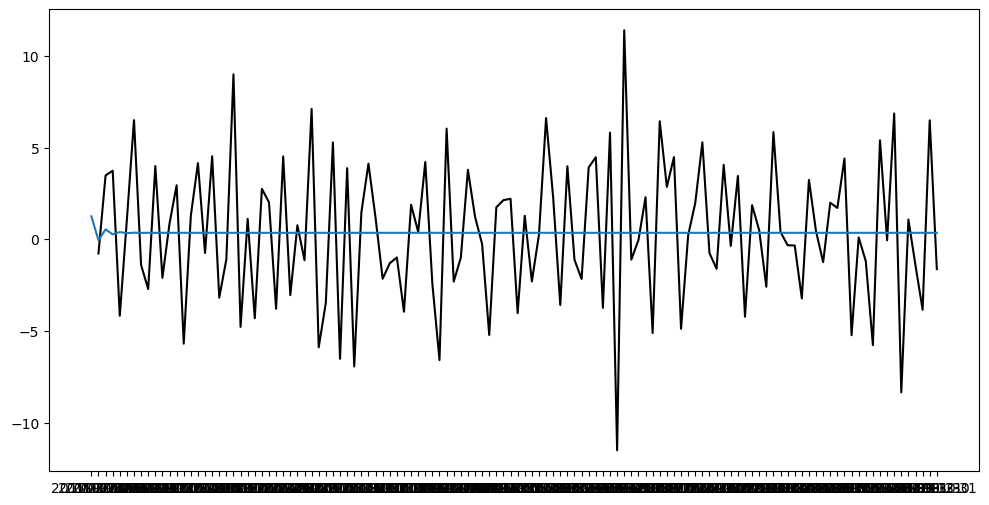

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['diff1'], color='black')
plt.plot(df.index, model_pred)
plt.show()